### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c:\Users\hultb\Doom\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

limit = 12500
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

print(x_train.shape)
print(y_train.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\hultb\Doom\.venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


(12500,)
(12500,)


In [3]:
print(x_train[0][:12]) # Print the first 12 words of the first review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468]


In [4]:
# Print the actual text instead of the numbers above
word_index = imdb.get_word_index()

def decode_review(text, word_index):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print(decode_review(x_train[0][:12], word_index))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
? this film was just brilliant casting location scenery story direction everyone's


In [ ]:
# Analyze review lengths

wc = np.array([len(x) for x in x_train])
print(np.median(wc))
print(np.mean(wc <= 500))

178.0
0.91536


In [ ]:
# Pad sequences to ensure uniform input length

maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(np.shape(x_train))
print(np.shape(x_test))

(12500, 500)
(12500, 500)


### Create an RNN, use embeddings and LSTM

In [8]:
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=10000, output_dim=32))

model.add(keras.layers.LSTM(units=32))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128, 
                    validation_data=(x_test, y_test),
                    verbose=2)

Epoch 1/5
98/98 - 14s - 140ms/step - accuracy: 0.5851 - loss: 0.6753 - val_accuracy: 0.6182 - val_loss: 0.6337
Epoch 2/5
98/98 - 12s - 125ms/step - accuracy: 0.7727 - loss: 0.4897 - val_accuracy: 0.8182 - val_loss: 0.4307
Epoch 3/5
98/98 - 12s - 125ms/step - accuracy: 0.8368 - loss: 0.3864 - val_accuracy: 0.8434 - val_loss: 0.3697
Epoch 4/5
98/98 - 12s - 125ms/step - accuracy: 0.8630 - loss: 0.3350 - val_accuracy: 0.8297 - val_loss: 0.3882
Epoch 5/5
98/98 - 12s - 124ms/step - accuracy: 0.8853 - loss: 0.2978 - val_accuracy: 0.8489 - val_loss: 0.3599


391/391 - 7s - 17ms/step


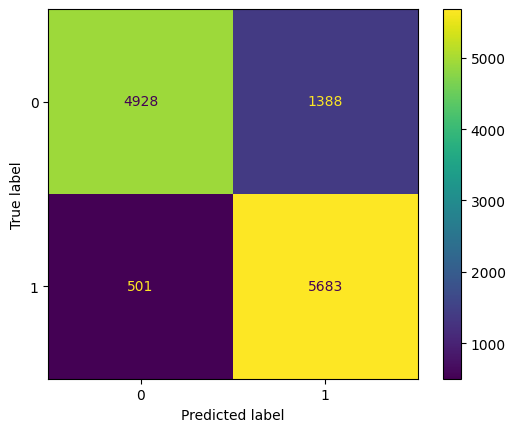

In [10]:
# Evaluate the model and create a confusion matrix
predictions = (model.predict(x_test, verbose=2) > 0.5).astype(int)

result = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(result)
disp.plot()